<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 6: Information Theory
### Miscellaneous images

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import string
from collections import Counter
import operator

import nltk # NLTK may need to be installed. See www.nltk.org
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

import seaborn as sns ; sns.set()

In [2]:
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.labelpad'] = 8
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12

In [3]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
Don_Quixote_path = file_helper.get_input_file_path('don-quixote.txt')
Huckleberry_Finn_path = file_helper.get_input_file_path('huckleberry-finn.txt')
Tale_of_Two_Cities_path = file_helper.get_input_file_path('tale-of-two-cities.txt')
Treasure_Island_path = file_helper.get_input_file_path('treasure-island.txt')

In [5]:
def get_book_text(filename):
    with open(filename, 'r') as myfile:
        text = myfile.read()
    exclude_punc = set(string.punctuation)
    exclude_digits = set(string.digits)
    exclude_symbols = '”“‘—°'
    
    text = text.replace('\n', '')
    text = text.replace("'", "")
    text = text.replace("’", "")
    text = ''.join(ch for ch in text if ch not in exclude_punc)
    text = ''.join(ch for ch in text if ch not in exclude_digits)
    text = ''.join(ch for ch in text if ch not in exclude_symbols)
    text = text.lower()        
    return text

In [6]:
def get_book_chars(filename):
    text = get_book_text(filename)
    text = text.replace(" ", "")
    return text

In [7]:
def get_book_freq_dist(filename):
    text = get_book_text(filename)     
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    freq_dist = FreqDist(tokens)
    return freq_dist

In [8]:
def plot_top_words(num_words, fdist, book_name, filename):
    top = fdist.most_common(num_words)
    top_words = [v[0] for v in top]
    top_counts = [v[1] for v in top]
    plt.barh(range(num_words), top_counts, align='center')
    plt.yticks(range(num_words), top_words)
    plt.xlabel('Times Used')
    plt.ylabel('Word')
    plt.title('Most Frequent '+str(num_words)+' Words in '+book_name)
    plt.ylim(-1,num_words)
    file_helper.save_figure(filename)
    plt.show()

In [9]:
def plot_top_chars(char_counts, book_name, filename, make_pdf=False):
    chars = [v[0] for v in char_counts]
    counts = [v[1] for v in char_counts]
    if make_pdf:
        count_sum = np.sum(counts)
        counts = [c/count_sum for c in counts]
    plt.barh(range(len(counts)), counts, align='center')
    plt.yticks(range(len(chars)), chars)
    if make_pdf:
        plt.xlabel('Relative Frequency')
        plt.title('Character Usage in '+book_name)
    else:
        plt.xlabel('Times Used')
        plt.title('Character Counts in '+book_name)
    plt.ylabel('Character')
    plt.ylim(-1,len(chars))
    file_helper.save_figure(filename)
    plt.show()

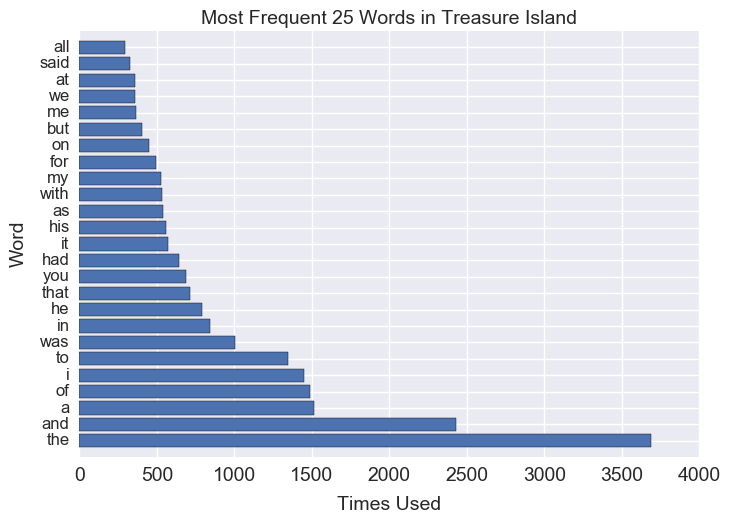

In [10]:
TI_freq_dist = get_book_freq_dist(Treasure_Island_path)
plot_top_words(25, TI_freq_dist, 'Treasure Island', 'top-25-words-Treasure-Island')

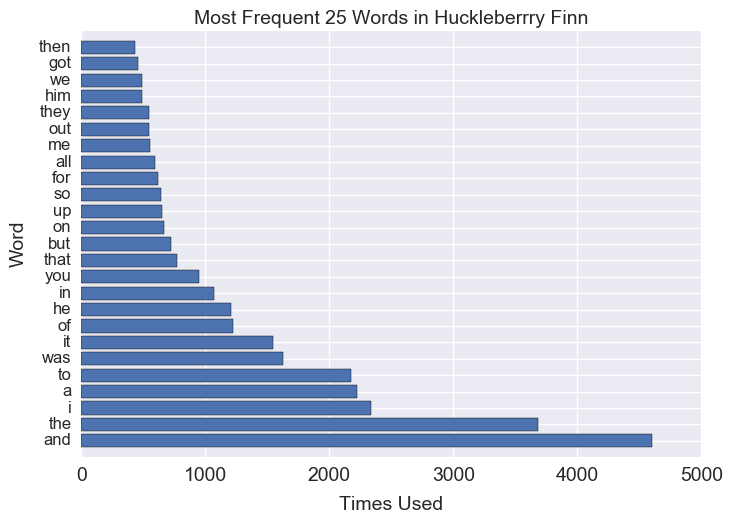

In [11]:
HF_freq_dist = get_book_freq_dist(Huckleberry_Finn_path)
plot_top_words(25, HF_freq_dist, 'Huckleberrry Finn', 'top-25-words-Huckleberry-Finn')

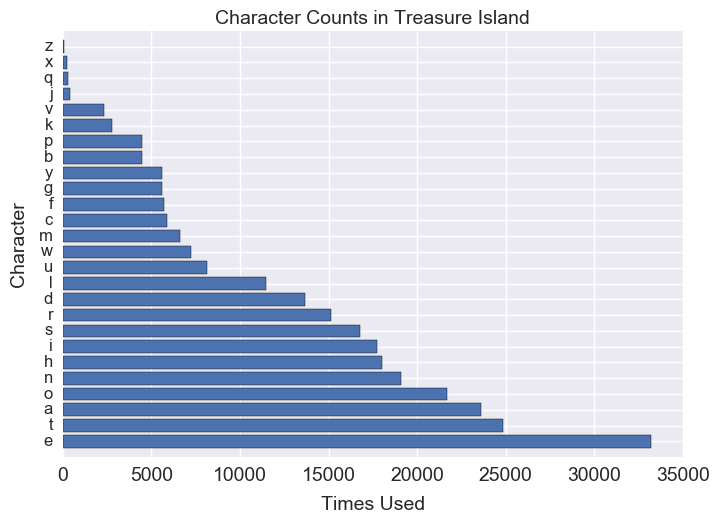

In [12]:
TI_chars = get_book_chars(Treasure_Island_path)
TI_counter = Counter(TI_chars)
TI_char_counts = sorted(TI_counter.items(), key=operator.itemgetter(1))
TI_char_counts = list(reversed(TI_char_counts))
plot_top_chars(TI_char_counts, 'Treasure Island', 'char-counts-Treasure-Island')

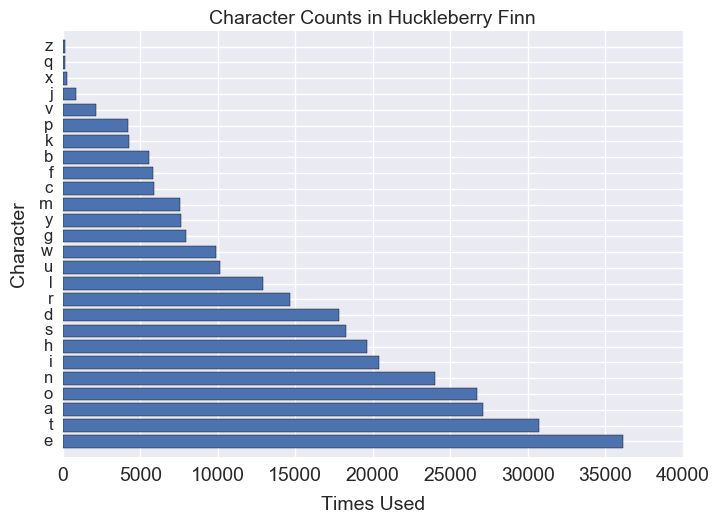

In [13]:
HF_chars = get_book_chars(Huckleberry_Finn_path)
HF_counter = Counter(HF_chars)
HF_char_counts = sorted(HF_counter.items(), key=operator.itemgetter(1))
HF_char_counts = list(reversed(HF_char_counts))
plot_top_chars(HF_char_counts, 'Huckleberry Finn', 'char-counts-Huckleberry-Finn')

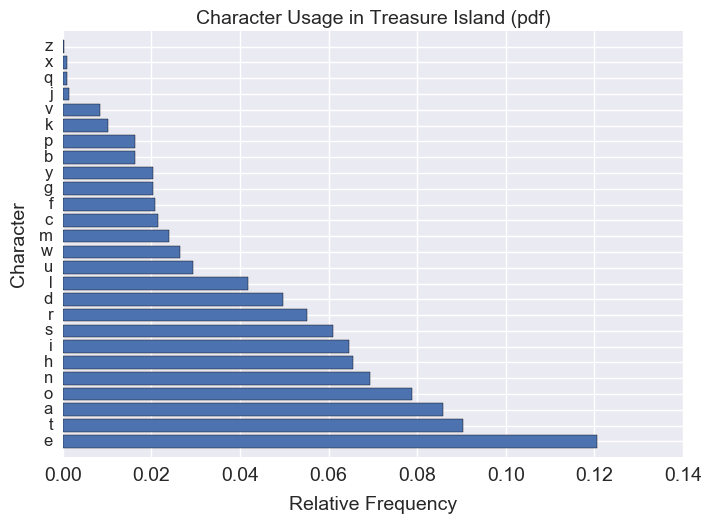

In [14]:
TI_chars = get_book_chars(Treasure_Island_path)
TI_counter = Counter(TI_chars)
TI_char_counts = sorted(TI_counter.items(), key=operator.itemgetter(1))
TI_char_counts = list(reversed(TI_char_counts))
plot_top_chars(TI_char_counts, 'Treasure Island (pdf)', 'char-counts-Treasure-Island-pdf', True)

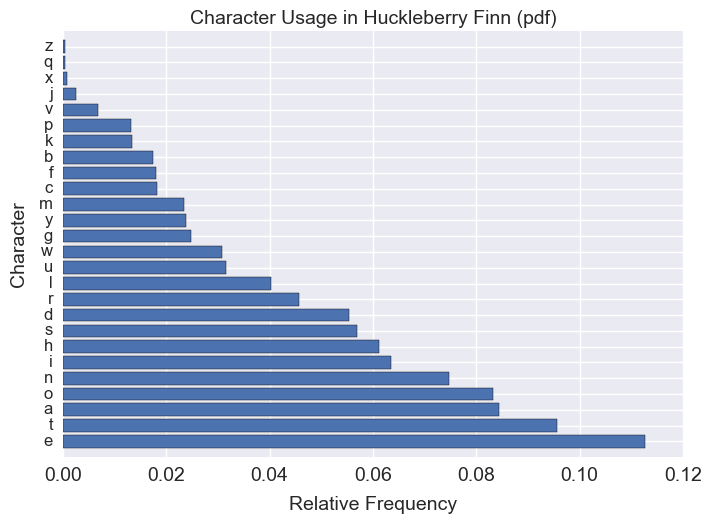

In [15]:
HF_chars = get_book_chars(Huckleberry_Finn_path)
HF_counter = Counter(HF_chars)
HF_char_counts = sorted(HF_counter.items(), key=operator.itemgetter(1))
HF_char_counts = list(reversed(HF_char_counts))
plot_top_chars(HF_char_counts, 'Huckleberry Finn (pdf)', 'char-counts-Huckleberry-Finn-pdf', True)

In [16]:
# Huffman coding adapted from https://rosettacode.org/wiki/Huffman_coding
def build_dictionary(uncompressed):
    dict_seed = 'abcdefghijklmnopqrstuvwxyz0123456789 '
    dict_size = len(dict_seed)
    dictionary = {dict_seed[i]: i for i in range(len(dict_seed))}
 
    w = ""
    for c in uncompressed:
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            dictionary[wc] = dict_size
            dict_size += 1
            w = c
 
    return dictionary

def compress_from_dictionary(uncompressed, dictionary):
    w = ""
    result = []
    for c in uncompressed:
        if c == '': continue
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            if w in dictionary:
                result.append(dictionary[w])
            w = c
    if w:
        result.append(dictionary[w])
    return result

def decompress_from_dictionary(compressed, dictionary):
    idict = {}
    for key, val in dictionary.items():
        if val in idict:
            print("Hey! ",val," is already in idict")
        idict[val] = key
    result = ""
    for code_num in compressed:
        next_token = '?'
        if code_num in idict:
            next_token = idict[code_num]
        result += next_token
    return result

def get_compression_stats(text, dictionary):
    compressed = compress_from_dictionary(text, dictionary)
    bit_count = 0
    for v in compressed:
        bit_count += len(bin(v))-2  # remove the '0b' at start of string
    return (compressed, bit_count)

In [17]:
def plot_TI_and_HF():
    
    fontsize = 16

    TI_text = get_book_text(Treasure_Island_path)
    HF_text = get_book_text(Huckleberry_Finn_path)
    TI_dict = build_dictionary(TI_text)
    HF_dict = build_dictionary(HF_text)
    TI_factor = 1.0 / (5 * len(TI_text))
    HF_factor = 1.0 / (5 * len(HF_text))
    
    TI_bits_TI_dict = TI_factor * get_compression_stats(TI_text, TI_dict)[1]     
    TI_bits_HF_dict = TI_factor * get_compression_stats(TI_text, HF_dict)[1]
    HF_bits_TI_dict = HF_factor * get_compression_stats(HF_text, TI_dict)[1]
    HF_bits_HF_dict = HF_factor * get_compression_stats(HF_text, HF_dict)[1]
    
    plt.figure(figsize=(10,3))
    plt.barh([0,1], [TI_bits_TI_dict, TI_bits_HF_dict], height=0.6, align='center')
    plt.yticks([0,1], ['Treasure Island', 'Huckleberry Finn'], fontsize=fontsize)
    plt.ylabel('Book Used to Make Code', fontsize=fontsize)
    plt.xlabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of Treasure Island', fontsize=fontsize)
    file_helper.save_figure('TI-vs-HF')
    plt.show()
    
    
    plt.figure(figsize=(10,3))
    plt.barh([0,1], [HF_bits_TI_dict, HF_bits_HF_dict], height=0.6, align='center')
    plt.yticks([0,1], ['Treasure Island', 'Huckleberry Finn'], fontsize=fontsize)
    plt.ylabel('Book Used to Make Code', fontsize=fontsize)
    plt.xlabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of Huckleberry Finn', fontsize=fontsize)
    file_helper.save_figure('HF-vs-TI')
    plt.show()

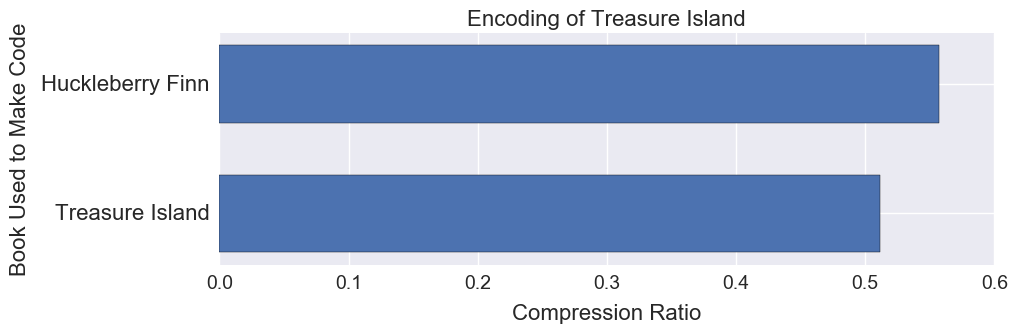

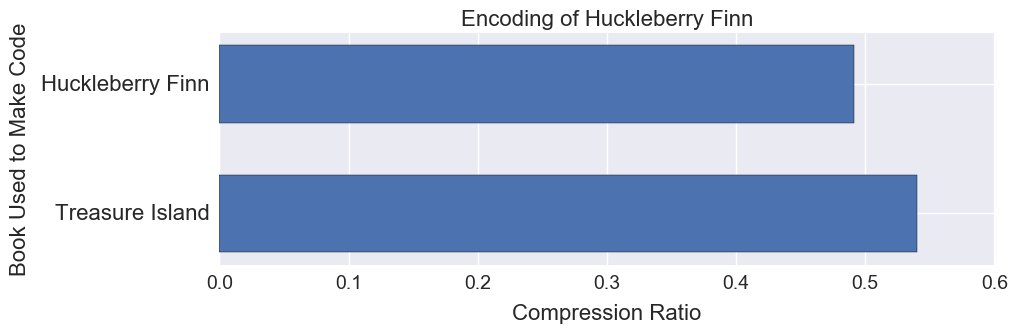

In [18]:
plot_TI_and_HF()

In [27]:
def plot_efficiencies():
    fontsize = 16
    
    TI_text = get_book_text(Treasure_Island_path)
    HF_text = get_book_text(Huckleberry_Finn_path)
    TC_text = get_book_text(Tale_of_Two_Cities_path)
    DQ_text = get_book_text(Don_Quixote_path)

    TI_dict = build_dictionary(TI_text)
    HF_dict = build_dictionary(HF_text)
    TC_dict = build_dictionary(TC_text)
    DQ_dict = build_dictionary(DQ_text)
    
    TI_factor = 1.0 / (5 * len(TI_text))
    HF_factor = 1.0 / (5 * len(HF_text))
    TC_factor = 1.0 / (5 * len(TC_text))
    DQ_factor = 1.0 / (5 * len(DQ_text))
    
    TI_bits_TI_dict = TI_factor * get_compression_stats(TI_text, TI_dict)[1]     
    TI_bits_HF_dict = TI_factor * get_compression_stats(TI_text, HF_dict)[1]
    TI_bits_TC_dict = TI_factor * get_compression_stats(TI_text, TC_dict)[1]
    TI_bits_DQ_dict = TI_factor * get_compression_stats(TI_text, DQ_dict)[1]
    
    HF_bits_TI_dict = HF_factor * get_compression_stats(HF_text, TI_dict)[1]
    HF_bits_HF_dict = HF_factor * get_compression_stats(HF_text, HF_dict)[1]
    HF_bits_TC_dict = HF_factor * get_compression_stats(HF_text, TC_dict)[1]
    HF_bits_DQ_dict = HF_factor * get_compression_stats(HF_text, DQ_dict)[1]
    
    TC_bits_TI_dict = TC_factor * get_compression_stats(TC_text, TI_dict)[1]
    TC_bits_HF_dict = TC_factor * get_compression_stats(TC_text, HF_dict)[1]
    TC_bits_TC_dict = TC_factor * get_compression_stats(TC_text, TC_dict)[1]
    TC_bits_DQ_dict = TC_factor * get_compression_stats(TC_text, DQ_dict)[1]
    
    DQ_bits_TI_dict = DQ_factor * get_compression_stats(DQ_text, TI_dict)[1]
    DQ_bits_HF_dict = DQ_factor * get_compression_stats(DQ_text, HF_dict)[1]
    DQ_bits_TC_dict = DQ_factor * get_compression_stats(DQ_text, TC_dict)[1]
    DQ_bits_DQ_dict = DQ_factor * get_compression_stats(DQ_text, DQ_dict)[1]
    
    plt.figure(figsize=(10,3))
    plt.barh([0,1,2,3], [TI_bits_TI_dict, TI_bits_HF_dict, TI_bits_TC_dict, TI_bits_DQ_dict], height=0.6, align='center')
    plt.xticks([0,.1,.2,.3,.4,.5,.6],[0,.1,.2,.3,.4,.5,.6])
    plt.yticks([0,1,2,3], ['Treasure Island', 'Huckleberry Finn', 'A Tale of Two Cities', 'Don Quixote'], fontsize=fontsize)
    plt.ylabel('Book Used to Make Code', fontsize=fontsize)
    plt.xlabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of Treasure Island', fontsize=fontsize)
    filename = 'encoding-efficiency-Treasure-Island'
    file_helper.save_figure(filename)
    plt.show()
    
    plt.figure(figsize=(10,6))
    
    plt.subplot(1, 3, 1)
    plt.bar([0,1,2,3], [HF_bits_TI_dict, HF_bits_HF_dict, HF_bits_TC_dict, HF_bits_DQ_dict], width=0.6, align='center')
    plt.xticks([0,1,2,3], ['Treasure Island', 'Huckleberry Finn', 'A Tale of Two Cities', 'Don Quixote'], rotation=-90, fontsize=fontsize)
    plt.yticks([0,.1,.2,.3,.4,.5,.6],[0,.1,.2,.3,.4,.5,.6])
    plt.xlabel('Book Used to Make Code', fontsize=fontsize)
    plt.ylabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of Huckleberry Finn', fontsize=fontsize, y=1.08)
    
    plt.subplot(1, 3, 2)
    plt.bar([0,1,2,3], [TC_bits_TI_dict, TC_bits_HF_dict, TC_bits_TC_dict, TC_bits_DQ_dict], width=0.6, align='center')
    plt.xticks([0,1,2,3], ['Treasure Island', 'Huckleberry Finn', 'A Tale of Two Cities', 'Don Quixote'], rotation=-90, fontsize=fontsize)
    plt.yticks([0,.1,.2,.3,.4,.5,.6],[0,.1,.2,.3,.4,.5,.6])
    plt.xlabel('Book Used to Make Code', fontsize=fontsize)
    plt.ylabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of A Tale of Two Cities', fontsize=fontsize, y=1.08)
    
    plt.subplot(1, 3, 3)
    plt.bar([0,1,2,3], [DQ_bits_TI_dict, DQ_bits_HF_dict, DQ_bits_TC_dict, DQ_bits_DQ_dict], width=0.6, align='center')
    plt.xticks([0,1,2,3], ['Treasure Island', 'Huckleberry Finn', 'A Tale of Two Cities', 'Don Quixote'], rotation=-90, fontsize=fontsize)
    plt.yticks([0,.1,.2,.3,.4,.5,.6],[0,.1,.2,.3,.4,.5,.6])
    plt.xlabel('Book Used to Make Code', fontsize=fontsize)
    plt.ylabel('Compression Ratio', fontsize=fontsize)
    plt.title('Encoding of Don Quixote', fontsize=fontsize, y=1.08)
    
    plt.tight_layout()
    file_helper.save_figure("encoding-efficiency-other-books")
    plt.show()

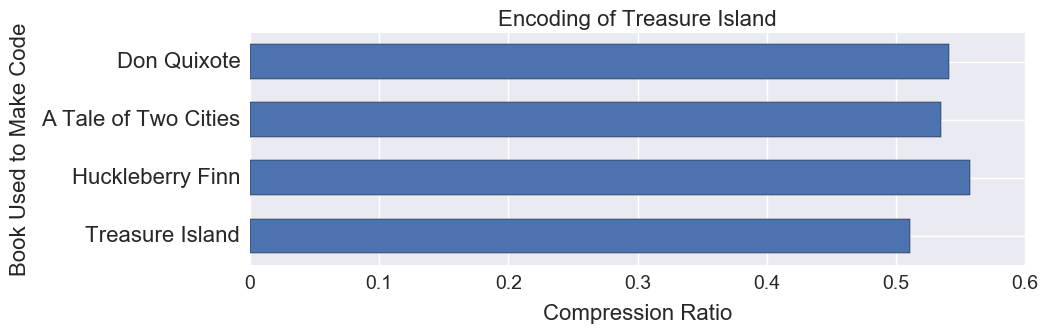

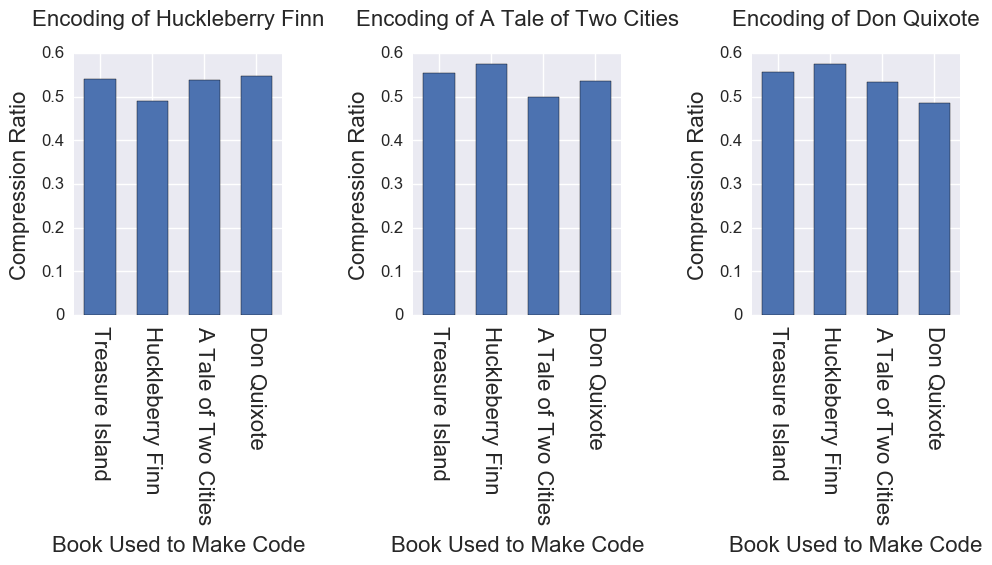

In [28]:
plot_efficiencies()

In [21]:
def compute_KL_Divergences():
    TI_freq_dist = get_book_freq_dist(Treasure_Island_path)
    HF_freq_dist = get_book_freq_dist(Huckleberry_Finn_path)

    # normalize the frequency distributions so they're pmfs
    TI_word_total = 0
    for key in TI_freq_dist.keys():
        TI_word_total += TI_freq_dist[key]
    for key in TI_freq_dist.keys():
        TI_freq_dist[key] /= TI_word_total

    HF_word_total = 0
    for key in HF_freq_dist.keys():
        HF_word_total += HF_freq_dist[key]
    for key in HF_freq_dist.keys():
        HF_freq_dist[key] /= HF_word_total
        
        
    num_words = 25
    bar_height = 0.35
    TI_top = TI_freq_dist.most_common(num_words)
    TI_top_words = [v[0] for v in TI_top]
    TI_top_counts = [v[1] for v in TI_top]
    HF_top_counts = [HF_freq_dist[w] for w in TI_top_words]
    indices = list(range(num_words))
    indices2 = [i+bar_height for i in indices]
    plt.barh(indices, TI_top_counts, height=bar_height, color='#D15D49', align='center', label='Treasure Island')  # red
    plt.barh(indices2, HF_top_counts, height=bar_height, color='#5386C2', align='center', label='Huckleberry Finn') # blue
    plt.yticks(indices, TI_top_words)
    plt.xlabel('Probability of Word')
    plt.ylabel('Word')
    plt.title('Probability of Words')
    plt.ylim(-1,num_words)
    plt.legend(loc='upper right')
    file_helper.save_figure('Treasure-Island-words-pmf')
    plt.show()        

    # Find KL(TI||HF)
    KL_TI_HF = 0
    for key in TI_freq_dist.keys():
        if key in HF_freq_dist:
            TI_val = TI_freq_dist[key]
            HF_val = HF_freq_dist[key]
            if (TI_val != 0) and (HF_val != 0):
                val = TI_freq_dist[key] * (math.log(TI_freq_dist[key],2) - math.log(HF_freq_dist[key],2))
            KL_TI_HF += val

    # Find KL(HF||TI)
    KL_HF_TI = 0
    for key in HF_freq_dist.keys():
        if key in TI_freq_dist:
            HF_val = HF_freq_dist[key]
            TI_val = TI_freq_dist[key]
            if (HF_val != 0) and (TI_val != 0):
                val = HF_freq_dist[key] * (math.log(HF_freq_dist[key],2) - math.log(TI_freq_dist[key],2))
            KL_HF_TI += val

    print("KL Divergence (Treasure Island || Huckleberry Finn) = ",KL_TI_HF)
    print("KL Divergence (Huckleberry Finn || Treasure Island) = ",KL_HF_TI)

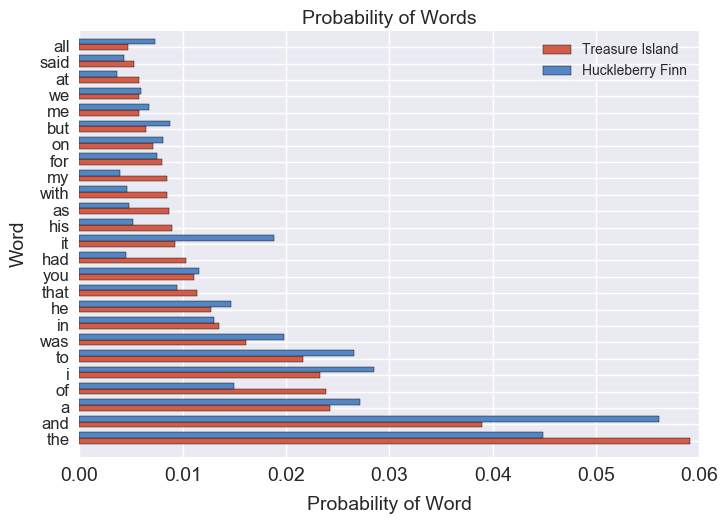

KL Divergence (Treasure Island || Huckleberry Finn) =  0.2872178152678771
KL Divergence (Huckleberry Finn || Treasure Island) =  0.4882870390053065


In [22]:
compute_KL_Divergences()

In [23]:
def count_Morse_symbols(text):
    num_symbols = 0
    MC_counts = { 'a':2, 'b':4, 'c':5, 'd':3, 'e':1, 'f':4, 'g':3, 'h':4, 'i':2,
                  'j':4, 'k':3, 'l':4, 'm':2, 'n':2, 'o':3, 'p':4, 'q':4, 'r':3,
                  's':3, 't':1, 'u':3, 'v':4, 'w':3, 'x':4, 'y':4, 'z':4 }
    for ch in text:
        if ch in MC_counts:
            num_symbols += MC_counts[ch]
    return num_symbols

In [24]:
TI_text = get_book_text(Treasure_Island_path )
print("letters in Treasure Island: ",len(TI_text))
print("Morse Code symbols in Treasure Island: ",count_Morse_symbols(TI_text))

letters in Treasure Island:  338202
Morse Code symbols in Treasure Island:  707170
